# Topic Modeling Using Twitter and LDA

In [1]:
#Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install textblob
%matplotlib inline
import tweepy
from textblob import TextBlob
import re
from collections import Counter


In [3]:
#Accessing twitter credentials

In [5]:
df_key=pd.read_excel("twittercredentials.xlsx")
# Assigning the essential key values
access_token= df_key['value'][3]
access_token_secret= df_key['value'][4]
consumer_key= df_key['value'][5]
consumer_secret= df_key['value'][6]
Bearer_Token=df_key['value'][2]
client = tweepy.Client(bearer_token=Bearer_Token)

In [6]:
#Taking user input as a twitter handler

In [7]:
# Replace with your own search query
twitter_handler = input("Enter the Keywords related to search topic:")
# query = 'Twitter, Elon Musk, Poison Pill'
#twitter_handler = '@realDonaldTrump'

tweets=tweepy.Paginator(client.search_recent_tweets, query=twitter_handler, tweet_fields=['context_annotations', 'created_at','lang','possibly_sensitive'], 
                        max_results=100).flatten(limit=1000)
i=1
data = []
lang=[]
sens=[]
for tweet in tweets:
    print(str(i)+') '+tweet.text)
    data.append([tweet.text])
    lang.append([tweet.lang])
    sens.append([tweet.possibly_sensitive])
    i=i+1

df = pd.DataFrame(data, columns=['Tweet'])
df['Language'] = pd.DataFrame(lang, columns=['Language'])
#df['Sensitivity']= pd.DataFrame(sens, columns=['Sensitivity'])

Enter the Keywords related to serach topic:@realDonaldTrump
1) RT @KoochPix: @The2ndaMEMEment @SantaSurfing @realDonaldTrump https://t.co/gr0sWYHAJb
2) RT @NRA: 45th President @realDonaldTrump is in the building at #NRAConvention!! https://t.co/RfCP7xNcm9
3) RT @NRA: President @RealDonaldTrump calls for national concealed carry reciprocity!!

"Just like your driver's license or your marriage lic…
4) @DavidErnestkag @NRA @realDonaldTrump bucco...based on the responses to your tweet,....somewhere between 0.5 and 1 Pct agree with you...basically.. no one agrees with your BS
5) @MarissaMeleske @realDonaldTrump @NRA Mike Pence 

#RepublicanSnake

  #BrutusRepublican 

   #GreatConservativePretender
6) RT @alexbruesewitz: “They say oh yea we want to run against Trump. But in the meantime, they’ve got 5000 prosecutors after my ass.” - @real…
7) RT @intheMatrixxx: “2024 is the year that we will defeat these nation-wrecking Globalists, Marxists, RINOs, and tyrants once and for all…If…
8) @andre

In [8]:
# Retaining only English Tweets from Twitter Data.

In [9]:
df_english= df[df.Language =="en"]
# Reviewing the Englist Tweets.
df_english.head(10)
# Removing all the Duplicates from the English Tweets.
df_unique=df_english.drop_duplicates(subset=['Tweet'], keep='first')
df_unique.reset_index(drop=True,inplace=True)
# Reviewing the Unique Englist Tweets.
df_unique.head(10)

,Tweet,Language
0,RT @NRA: 45th President @realDonaldTrump is in...,en
1,RT @NRA: President @RealDonaldTrump calls for ...,en
2,@DavidErnestkag @NRA @realDonaldTrump bucco......,en
3,@MarissaMeleske @realDonaldTrump @NRA Mike Pen...,en
4,RT @alexbruesewitz: “They say oh yea we want t...,en
5,RT @intheMatrixxx: “2024 is the year that we w...,en
6,@andrewpearl519 @JosRica19679377 @globaltimesn...,en
7,RT @MsDLovingLife: @NRA @realDonaldTrump Fact ...,en
8,RT @alexbruesewitz: Meanwhile @realDonaldTrump...,en
9,@joncoopertweets lol\nyou wish.\nI live in a f...,en


In [10]:
#Cleaning tweets  using regular expressions

In [11]:
import re
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #To substitue the user names. 
    text=re.sub(r'#','',text)
    text=re.sub(r"\?",'',text)
    text=re.sub(r'!','',text)
    text=re.sub(r'amp','',text) # To substitute Ampersand
    text=re.sub(r'_','',text)
    text=re.sub(r':','',text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'&',' and ',text)
    text=re.sub(r'RT','',text) # To substitute ReTweets
    text=re.sub(r'"','',text)
    text=re.sub(r"’",'',text)
    text=re.sub(r"‘",'',text)
    text=re.sub(r"'",'',text)
    text=re.sub(r",",'',text)
    text=re.sub(r'[A-Za-z0-9]{1}[.]+', '',text) # To substitute any texts followed by dots.
    text=re.sub(r'\s*RT\s*@[^:]*:.','',text) #To handle ReTweets.
    text=re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)','',text) # To substitute Links
    text=re.sub(r'https?\/\/\S+','',text) # To substitute Links
    text=re.sub(r'https//','',text) # To substitute Links

    return text
df_unique['Tweet']=df_unique['Tweet'].apply(cleanTxt)

C:\Users\user\AppData\Local\Temp\ipykernel_22208\3499704939.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Tweet']=df_unique['Tweet'].apply(cleanTxt)


In [12]:
df_unique['Tweet']=df_unique['Tweet'].str.lower()

C:\Users\user\AppData\Local\Temp\ipykernel_22208\3187788353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Tweet']=df_unique['Tweet'].str.lower()


In [13]:
df_unique.head(10)

,Tweet,Language
0,45th president is in the building at nracon...,en
1,president calls for national concealed carr...,en
2,buccbased on the responses to your tweesome...,en
3,mike pence republicansnake brutusrepublica...,en
4,“they say oh yea we want to run against trum...,en
5,“2024 is the year that we will defeat these ...,en
6,marcom this is absolutely min...,en
7,fact,en
8,meanwhile was greeted with thunderous chant...,en
9,lolyou wisi live in a favorite winter vacay s...,en


To transform the textual data in a format that will serve as an input for training LDA model.
We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

### Topic modeling using LDA

In [14]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import nltk.stem as stemmer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### preprocessing

In [15]:
data_text = df_unique[['Tweet']]
data_text['index'] = data_text.index
documents = data_text

In [16]:
print(len(documents))
print(documents[:5])

379
                                               Tweet  index
0    45th president  is in the building at nracon...      0
1    president  calls for national concealed carr...      1
2     buccbased on the responses to your tweesome...      2
3     mike pence republicansnake  brutusrepublica...      3
4    “they say oh yea we want to run against trum...      4


In [17]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
#Function for stemming and lemmatization

In [19]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [20]:
doc_sample = documents[documents['index'] == 50].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['', '', 'its', 'too', 'late', 'for', 'a', 'truc', '', 'has', 'been', 'firing', 'on', '', 'for', 'six', 'months', '(unprovoked).', 'soon', 'very', 'soon…', 'trump', 'will', 'hear', 'from', 'the', 'rest', 'of', 'us…', '', 'and', ';', 'we', 'will', 'retire', 'him', 'to', 'the', 'ash', 'bin', 'of', 'histor']


 tokenized and lemmatized document: 
['late', 'truc', 'fire', 'months', 'unprovoked', 'soon', 'soon', 'trump', 'hear', 'rest', 'retire', 'histor']


In [21]:
print(len(preprocess(doc_sample)))

12


In [22]:
processed_docs = documents['Tweet'].map(preprocess)
processed_docs[:10]

0                    [president, build, nraconvention]
1    [president, call, national, conceal, carry, re...
2    [buccbased, responses, tweesomewhere, agree, y...
3                       [mike, pence, republicansnake]
4          [want, trum, meantime, theyve, prosecutors]
5    [year, defeat, nation, wreck, globalists, marx...
6    [marcom, absolutely, mind, blow, think, possib...
7                                               [fact]
8                           [greet, thunderous, chant]
9    [lolyou, wisi, live, favorite, winter, vacay, ...
Name: Tweet, dtype: object

In [23]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 build
1 nraconvention
2 president
3 call
4 carry
5 conceal
6 drivers
7 license
8 like
9 marriage
10 national


#### Document Matrix

In [24]:
import gensim.corpora as corpora


In [25]:
def create_dictionary(words):
    return corpora.Dictionary(words)
#passing the dataframe column having tokens as the argument
id2word=create_dictionary(processed_docs)
print(id2word)

Dictionary(1442 unique tokens: ['build', 'nraconvention', 'president', 'call', 'carry']...)


In [26]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(processed_docs,id2word)
print(processed_docs[0])
print(corpus[0])

['president', 'build', 'nraconvention']
[(0, 1), (1, 1), (2, 1)]


In [27]:
len(processed_docs)

379

In [28]:
processed_docs[0]

['president', 'build', 'nraconvention']

#### TFIDF

In [30]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


we will build a model with 10 topics where each topic is a combination of keywords, 
each keyword contributes a certain weightage to the topic.

#### Running LDA using Bag of Words


In [31]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [32]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.328*"people" + 0.294*"know" + 0.116*"need" + 0.116*"like" + 0.079*"go" + 0.045*"trump" + 0.011*"president" + 0.011*"desantis"
Topic: 1 
Words: 0.692*"people" + 0.082*"need" + 0.082*"go" + 0.062*"trump" + 0.029*"know" + 0.024*"like" + 0.024*"desantis" + 0.006*"president"
Topic: 2 
Words: 0.302*"go" + 0.302*"like" + 0.163*"trump" + 0.105*"desantis" + 0.084*"people" + 0.031*"know" + 0.006*"president" + 0.006*"need"
Topic: 3 
Words: 0.801*"go" + 0.107*"president" + 0.042*"like" + 0.010*"trump" + 0.010*"need" + 0.010*"know" + 0.010*"people" + 0.010*"desantis"
Topic: 4 
Words: 0.507*"like" + 0.177*"need" + 0.176*"trump" + 0.105*"people" + 0.023*"president" + 0.004*"know" + 0.004*"go" + 0.004*"desantis"
Topic: 5 
Words: 0.701*"trump" + 0.242*"need" + 0.015*"know" + 0.014*"desantis" + 0.012*"like" + 0.008*"president" + 0.007*"people" + 0.002*"go"
Topic: 6 
Words: 0.876*"president" + 0.037*"like" + 0.028*"know" + 0.024*"desantis" + 0.015*"people" + 0.013*"go" + 0.003*"trump" 

In [33]:
processed_docs[2]


['buccbased', 'responses', 'tweesomewhere', 'agree', 'yobasicall', 'agree']

In [34]:
for index, score in sorted(lda_model[bow_corpus[2]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.10000000149011612	 
Topic: 0.328*"people" + 0.294*"know" + 0.116*"need" + 0.116*"like" + 0.079*"go" + 0.045*"trump" + 0.011*"president" + 0.011*"desantis"

Score: 0.10000000149011612	 
Topic: 0.692*"people" + 0.082*"need" + 0.082*"go" + 0.062*"trump" + 0.029*"know" + 0.024*"like" + 0.024*"desantis" + 0.006*"president"

Score: 0.10000000149011612	 
Topic: 0.302*"go" + 0.302*"like" + 0.163*"trump" + 0.105*"desantis" + 0.084*"people" + 0.031*"know" + 0.006*"president" + 0.006*"need"

Score: 0.10000000149011612	 
Topic: 0.801*"go" + 0.107*"president" + 0.042*"like" + 0.010*"trump" + 0.010*"need" + 0.010*"know" + 0.010*"people" + 0.010*"desantis"

Score: 0.10000000149011612	 
Topic: 0.507*"like" + 0.177*"need" + 0.176*"trump" + 0.105*"people" + 0.023*"president" + 0.004*"know" + 0.004*"go" + 0.004*"desantis"

Score: 0.10000000149011612	 
Topic: 0.701*"trump" + 0.242*"need" + 0.015*"know" + 0.014*"desantis" + 0.012*"like" + 0.008*"president" + 0.007*"people" + 0.002*"go"

Score: 0.

#### Running LDA using TF-IDF


In [35]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.749*"go" + 0.117*"people" + 0.041*"know" + 0.028*"desantis" + 0.026*"like" + 0.024*"need" + 0.007*"trump" + 0.007*"president"
Topic: 1 Word: 0.719*"need" + 0.116*"know" + 0.059*"like" + 0.046*"go" + 0.035*"desantis" + 0.008*"trump" + 0.008*"president" + 0.008*"people"
Topic: 2 Word: 0.691*"president" + 0.172*"trump" + 0.069*"go" + 0.024*"people" + 0.023*"desantis" + 0.014*"know" + 0.004*"need" + 0.004*"like"
Topic: 3 Word: 0.381*"desantis" + 0.248*"president" + 0.126*"need" + 0.126*"know" + 0.030*"trump" + 0.030*"people" + 0.030*"like" + 0.030*"go"
Topic: 4 Word: 0.877*"trump" + 0.058*"need" + 0.033*"president" + 0.012*"go" + 0.012*"know" + 0.003*"desantis" + 0.003*"like" + 0.003*"people"
Topic: 5 Word: 0.817*"know" + 0.092*"like" + 0.032*"desantis" + 0.024*"trump" + 0.009*"president" + 0.009*"need" + 0.009*"people" + 0.009*"go"
Topic: 6 Word: 0.734*"president" + 0.139*"like" + 0.059*"need" + 0.026*"desantis" + 0.019*"trump" + 0.007*"know" + 0.007*"people" + 0.007*"go"

#### Performance evaluation by classifying sample document using LDA TF-IDF model.

In [36]:
for index, score in sorted(lda_model_tfidf[bow_corpus[2]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.10000000149011612	 
Topic: 0.749*"go" + 0.117*"people" + 0.041*"know" + 0.028*"desantis" + 0.026*"like" + 0.024*"need" + 0.007*"trump" + 0.007*"president"

Score: 0.10000000149011612	 
Topic: 0.719*"need" + 0.116*"know" + 0.059*"like" + 0.046*"go" + 0.035*"desantis" + 0.008*"trump" + 0.008*"president" + 0.008*"people"

Score: 0.10000000149011612	 
Topic: 0.691*"president" + 0.172*"trump" + 0.069*"go" + 0.024*"people" + 0.023*"desantis" + 0.014*"know" + 0.004*"need" + 0.004*"like"

Score: 0.10000000149011612	 
Topic: 0.381*"desantis" + 0.248*"president" + 0.126*"need" + 0.126*"know" + 0.030*"trump" + 0.030*"people" + 0.030*"like" + 0.030*"go"

Score: 0.10000000149011612	 
Topic: 0.877*"trump" + 0.058*"need" + 0.033*"president" + 0.012*"go" + 0.012*"know" + 0.003*"desantis" + 0.003*"like" + 0.003*"people"

Score: 0.10000000149011612	 
Topic: 0.817*"know" + 0.092*"like" + 0.032*"desantis" + 0.024*"trump" + 0.009*"president" + 0.009*"need" + 0.009*"people" + 0.009*"go"

Score: 0.

#### Performance evaluation by classifying sample document using LDA Bag of Words model

In [37]:
for index, score in sorted(lda_model[bow_corpus[2]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.10000000149011612	 
Topic: 0.328*"people" + 0.294*"know" + 0.116*"need" + 0.116*"like" + 0.079*"go" + 0.045*"trump" + 0.011*"president" + 0.011*"desantis"

Score: 0.10000000149011612	 
Topic: 0.692*"people" + 0.082*"need" + 0.082*"go" + 0.062*"trump" + 0.029*"know" + 0.024*"like" + 0.024*"desantis" + 0.006*"president"

Score: 0.10000000149011612	 
Topic: 0.302*"go" + 0.302*"like" + 0.163*"trump" + 0.105*"desantis" + 0.084*"people" + 0.031*"know" + 0.006*"president" + 0.006*"need"

Score: 0.10000000149011612	 
Topic: 0.801*"go" + 0.107*"president" + 0.042*"like" + 0.010*"trump" + 0.010*"need" + 0.010*"know" + 0.010*"people" + 0.010*"desantis"

Score: 0.10000000149011612	 
Topic: 0.507*"like" + 0.177*"need" + 0.176*"trump" + 0.105*"people" + 0.023*"president" + 0.004*"know" + 0.004*"go" + 0.004*"desantis"

Score: 0.10000000149011612	 
Topic: 0.701*"trump" + 0.242*"need" + 0.015*"know" + 0.014*"desantis" + 0.012*"like" + 0.008*"president" + 0.007*"people" + 0.002*"go"

Score: 0.

#### Testing model 

In [38]:
testing_document1 = "Love encompasses a range of strong and positive emotional and mental states, from the most sublime virtue or good habit, the deepest interpersonal affection, to the simplest pleasure."
bow_vector = dictionary.doc2bow(preprocess(testing_document1))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.10000000149011612	 Topic: 0.328*"people" + 0.294*"know" + 0.116*"need" + 0.116*"like" + 0.079*"go"
Score: 0.10000000149011612	 Topic: 0.692*"people" + 0.082*"need" + 0.082*"go" + 0.062*"trump" + 0.029*"know"
Score: 0.10000000149011612	 Topic: 0.302*"go" + 0.302*"like" + 0.163*"trump" + 0.105*"desantis" + 0.084*"people"
Score: 0.10000000149011612	 Topic: 0.801*"go" + 0.107*"president" + 0.042*"like" + 0.010*"trump" + 0.010*"need"
Score: 0.10000000149011612	 Topic: 0.507*"like" + 0.177*"need" + 0.176*"trump" + 0.105*"people" + 0.023*"president"
Score: 0.10000000149011612	 Topic: 0.701*"trump" + 0.242*"need" + 0.015*"know" + 0.014*"desantis" + 0.012*"like"
Score: 0.10000000149011612	 Topic: 0.876*"president" + 0.037*"like" + 0.028*"know" + 0.024*"desantis" + 0.015*"people"
Score: 0.10000000149011612	 Topic: 0.273*"know" + 0.155*"president" + 0.154*"desantis" + 0.154*"like" + 0.154*"go"
Score: 0.10000000149011612	 Topic: 0.633*"desantis" + 0.172*"president" + 0.082*"trump" + 0.038

In [39]:
testing_document2 = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(testing_document2))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.10000000149011612	 Topic: 0.328*"people" + 0.294*"know" + 0.116*"need" + 0.116*"like" + 0.079*"go"
Score: 0.10000000149011612	 Topic: 0.692*"people" + 0.082*"need" + 0.082*"go" + 0.062*"trump" + 0.029*"know"
Score: 0.10000000149011612	 Topic: 0.302*"go" + 0.302*"like" + 0.163*"trump" + 0.105*"desantis" + 0.084*"people"
Score: 0.10000000149011612	 Topic: 0.801*"go" + 0.107*"president" + 0.042*"like" + 0.010*"trump" + 0.010*"need"
Score: 0.10000000149011612	 Topic: 0.507*"like" + 0.177*"need" + 0.176*"trump" + 0.105*"people" + 0.023*"president"
Score: 0.10000000149011612	 Topic: 0.701*"trump" + 0.242*"need" + 0.015*"know" + 0.014*"desantis" + 0.012*"like"
Score: 0.10000000149011612	 Topic: 0.876*"president" + 0.037*"like" + 0.028*"know" + 0.024*"desantis" + 0.015*"people"
Score: 0.10000000149011612	 Topic: 0.273*"know" + 0.155*"president" + 0.154*"desantis" + 0.154*"like" + 0.154*"go"
Score: 0.10000000149011612	 Topic: 0.633*"desantis" + 0.172*"president" + 0.082*"trump" + 0.038

In [40]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
 id2word=id2word,
 num_topics=10,
 random_state=100,
 )

In [41]:
def lda_topics(model, num_topics, top_n_words):
    word_dict = {}
    for i in range(num_topics):
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];
 
    return pd.DataFrame(word_dict)
lda_topics(lda_model,10,10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,president,trump,trump,trump,world,truth,trump,speech,children,know
1,dont,dont,need,president,need,say,president,agree,american,florida
2,want,like,like,youre,thats,president,know,year,save,leaker
3,like,jordan,people,thats,election,know,traitor,trump,people,speak
4,support,know,pence,videos,time,people,desantis,china,greatful,go
5,leak,national,come,people,want,wouldnt,look,mash,days,right
6,penalize,people,thats,work,go,baier,soon,amaze,unmatched,love
7,leave,youre,angry,look,stop,school,person,result,send,insurrection
8,say,carry,start,go,love,take,dont,president,twitter,desantis
9,call,vote,state,show,point,word,hear,desantis,help,vote


#### visualizing topic

In [42]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pyLDAvis
import pyLDAvis.gensim_models

In [44]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis


C:\Users\user\New folder\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.067846  0.153430       1        1  12.445294
6      0.086022 -0.180545       2        1  11.067567
9      0.040883  0.172757       3        1  10.984691
0     -0.079417 -0.169560       4        1  10.804706
4     -0.165238  0.073857       5        1  10.344441
8      0.159807  0.120256       6        1  10.132070
3      0.182968 -0.053186       7        1   9.930999
5     -0.184050 -0.056588       8        1   9.241769
1      0.073519 -0.017787       9        1   8.208475
7     -0.046648 -0.042635      10        1   6.839988, topic_info=           Term       Freq      Total Category  logprob  loglift
130       trump  38.000000  38.000000  Default  30.0000  30.0000
146    children   7.000000   7.000000  Default  29.0000  29.0000
216        need  14.000000  14.000000  Default  28.0000  28.0000
291      speech   6.000000   6.000000  Default  27.0000  27.0000
115    american   7.000000   7.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
8          like   0.655811  14.398865  Topic10  -5.6599  -0.4066
430       great   0.623095   5.862413  Topic10  -5.7111   0.4408
320        push   0.623094   1.866991  Topic10  -5.7111   1.5850
33   absolutely   0.623093   2.463249  Topic10  -5.7111   1.3078
41      process   0.623080   2.490192  Topic10  -5.7111   1.2969

[580 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
33        8  0.405968  absolutely
33        9  0.405968  absolutely
33       10  0.405968  absolutely
168       4  0.751503       abuse
471       9  0.800369      accord
...     ...       ...         ...
156       6  0.118536       youre
156       7  0.355607       youre
156       9  0.118536       youre
1336      3  0.747381       youth
875       7  0.513808        zero

[858 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 10, 1, 5, 9, 4, 6, 2, 8])

In [45]:
top_topics = lda_model.show_topics(num_topics=5, num_words=5, formatted=False)
top_5_topics = [(topic[0], [word[0] for word in topic[1]]) for topic in top_topics][:5]



#### Vizualizing using bar chart

Text(0.5, 1.0, 'Top-5 topics')

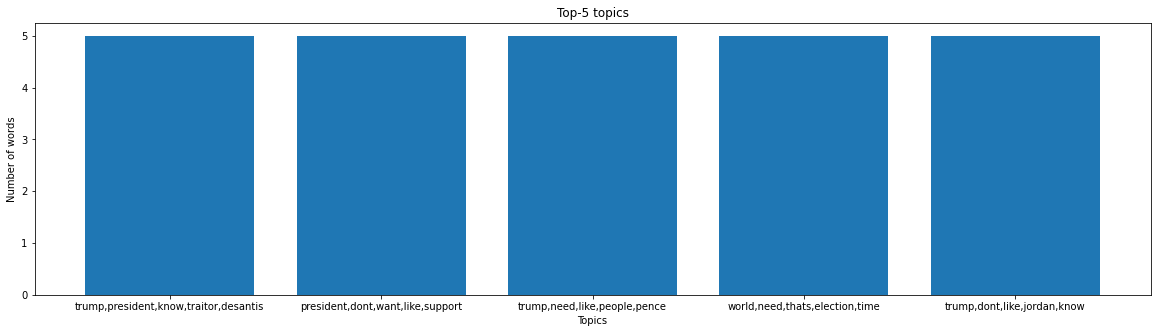

In [48]:
# Create a bar diagram of the top-5 topics
plt.figure(figsize=(20, 5))
plt.bar(range(len(top_5_topics)), [len(topic[1]) for topic in top_5_topics])
plt.xticks(range(len(top_5_topics)), [','.join(topic[1]) for topic in top_5_topics])
plt.xlabel('Topics')
plt.ylabel('Number of words')
plt.title('Top-5 topics')



#### Word cloud

In [49]:
import numpy as np

C:\Users\user\New folder\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\user\New folder\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\user\New folder\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\user\New folder\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

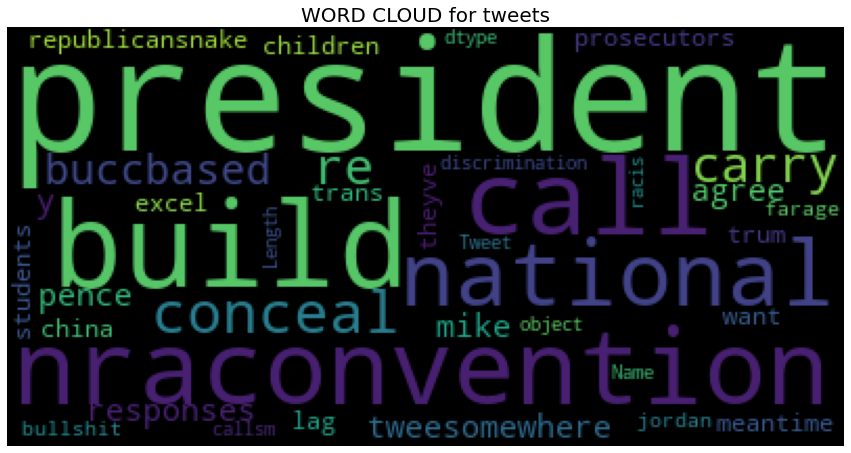

In [50]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (15,15))
stopwords = set(STOPWORDS)
#mask = np.array(Image.open("twitter.png"))
wordcloud = WordCloud(background_color = 'black',colormap='viridis',stopwords = stopwords,max_words = 1000,max_font_size = 120,random_state = 42).generate(str(processed_docs))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for tweets', fontsize = 20)
plt.axis('off')
plt.savefig("twitter.svg", format="png")
plt.show()